# Feature Scaling and Learning Rate

As we have seen if features have various scales, Gradient descent takes long time to converge. In this example we would use ***Feature Scaling*** and appropriate value for ***Learning Rate*** to make Gradient descent faster and hence training the model faster.
We would be reusing some of the code in last exercise - the code is copied here. Better idea would be add these functions to a python module and import here -- TODO

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
x_features = ['size(sqft)','bedrooms','floors','age']

#Here x is the feature vector, w is the parameter vector and b is bias.
def predict(x,w,b):
    return np.dot(x,w) + b

# xs is m training set for x
#y is output vector
#w is parameter vector and b is bias
def compute_cost(xs, y, w, b):
    m = xs.shape[0]
    cost = 0
    for i in range(m):
        cost = cost + ( predict(xs[i], w, b) - y[i])**2
    return cost / (2 * m)    

def gradient(x_train, y_train, w, b):
    m,n = x_train.shape # n is number of features.
    
    w_delta = np.zeros((n,))
    b_delta = 0.0
    
    for i in range(m):
        err = predict(x_train[i], w, b) - y_train[i]
        b_delta = b_delta + err 
        for j in range(n):
            w_delta[j] = w_delta[j] + err * x_train[i][j]
    
    return (w_delta/m, b_delta/m)
    
    
def gradient_descent(x_train, y_train, w_in, b_in, a, num_iter):
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    j_history = []
    
    for i in range(num_iter):
        w_delta, b_delta = gradient(x_train, y_train, w, b)
        w = w - a * w_delta
        b = b - a * b_delta
        cost = compute_cost(x_train, y_train, w, b)
        j_history.append(cost)
        
        if i % 10 == 0:
            print(f"Iteration {i:4d}: Cost {j_history[-1]:8.2f}   ")
    
    return (w,b, j_history)

There are multiple ways for ***Feature Scaling**. The one we would use here is ***Z-Score Normalization***. The way to do this is:
To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2
\end{align}
$$

In [3]:
# X - 2-D Array - mxn where 
#m is number of training set and n is number of features.
def z_score_normalize(X):
    mu = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    return (x - mu) / std , mu, std

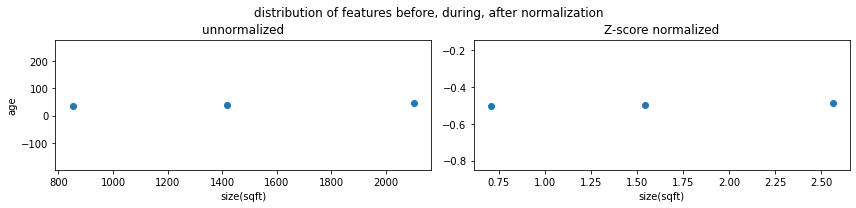

In [6]:
fig,ax=plt.subplots(1, 2, figsize=(12, 3))
ax[0].scatter(x_train[:,0], x_train[:,3])
ax[0].set_xlabel(x_features[0]); ax[0].set_ylabel(x_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

x_norm, mu, std = z_score_normalize(x_train)

ax[1].scatter(x_norm[:,0], x_norm[:,3])
ax[1].set_xlabel(x_features[0]); ax[0].set_ylabel(x_features[3]);
ax[1].set_title(r"Z-score normalized")
ax[1].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [9]:
# normalize the original features
x_norm, x_mu, x_sigma = z_score_normalize(x_train)
print(f"X_mu = {x_mu}, \nX_sigma = {x_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

X_mu = 375.5, 
X_sigma = 675.195465525848
Peak to Peak range by column in Raw        X:[1252    3    1   10]
Peak to Peak range by column in Normalized X:[1.85427786e+00 4.44315780e-03 1.48105260e-03 1.48105260e-02]


In [14]:
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 1.0e-1
# run gradient descent 
w_final, b_final, j_history = gradient_descent(x_norm, y_train, initial_w, initial_b,alpha, iterations)

Iteration    0: Cost 14308.30   
Iteration   10: Cost   906.44   
Iteration   20: Cost   790.55   
Iteration   30: Cost   717.17   
Iteration   40: Cost   670.70   
Iteration   50: Cost   641.26   
Iteration   60: Cost   622.62   
Iteration   70: Cost   610.81   
Iteration   80: Cost   603.33   
Iteration   90: Cost   598.60   
Iteration  100: Cost   595.60   
Iteration  110: Cost   593.70   
Iteration  120: Cost   592.49   
Iteration  130: Cost   591.73   
Iteration  140: Cost   591.25   
Iteration  150: Cost   590.94   
Iteration  160: Cost   590.75   
Iteration  170: Cost   590.63   
Iteration  180: Cost   590.55   
Iteration  190: Cost   590.50   
Iteration  200: Cost   590.47   
Iteration  210: Cost   590.44   
Iteration  220: Cost   590.43   
Iteration  230: Cost   590.42   
Iteration  240: Cost   590.42   
Iteration  250: Cost   590.41   
Iteration  260: Cost   590.41   
Iteration  270: Cost   590.41   
Iteration  280: Cost   590.41   
Iteration  290: Cost   590.41   
Iteration 

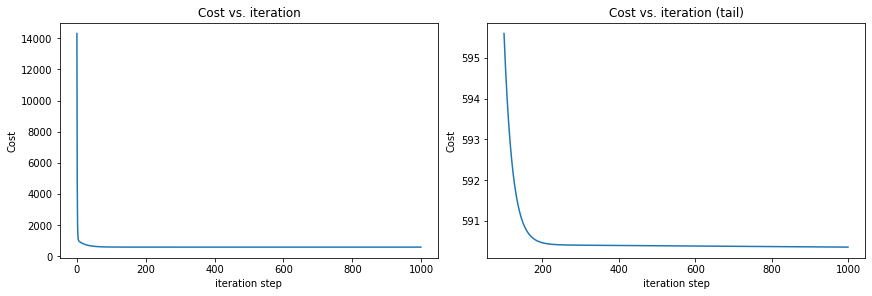

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(j_history)
ax2.plot(100 + np.arange(len(j_history[100:])), j_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

As we can see the gradient descent is converging faster after feature scaling and choosing right value of learning rate.

Another important point - As we have scaled the features we need to do the same for prediction as well. See the example below for predictions:

In [16]:
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - x_mu)/x_sigma

y_predict = predict(x_house_norm, w_final, b_final)
print(y_predict)

231.03517740440125
